Indian Startup Funding Analysis - Exploratory Data Analysis


Dataset: Indian Unicorn Startups 2023(102 campanies with $1B+ valuations)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv")

Basic Dataset information

In [39]:
print("Dataset shape",df.shape)
print("\n column Names")
print(df.columns.tolist)
print("\nFirst 5 rows")
df.head()


Dataset shape (102, 8)

 column Names
<bound method IndexOpsMixin.tolist of Index(['No.', 'Company', 'Sector', 'Entry Valuation^^ ($B)', 'Valuation ($B)',
       'Entry', 'Location', 'Select Investors'],
      dtype='object')>

First 5 rows


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [40]:
df['Company'].unique()

array(['InMobi', 'Flipkart^', 'Mu Sigma', 'Snapdeal*', 'PayTM^',
       'Ola Cabs', 'Quikr*', 'Zomato^', 'ShopClues*', 'Hike*', 'BYJUS',
       'PayTM Mall*', 'Swiggy', 'PolicyBazaar^', 'Freshworks^',
       'OYO Rooms', 'Udaan', 'BillDesk', 'Delhivery^', 'Rivigo',
       'BigBasket', 'Dream11', 'Druva Software', 'Icertis', 'CitiusTech',
       'Ola Electric', 'Lenskart', 'Pine Labs', 'Nykaa^', 'Postman',
       'Unacademy', 'RazorPay', 'Cars24', 'PhonePe^', 'Zenoti',
       'Dailyhunt', 'Glance InMobi', 'Digit', 'Innovaccer',
       'Infra.Market', 'Five Star Business Finance^', 'FirstCry',
       'Meesho', 'CRED', 'PharmEasy', 'Groww', 'ShareChat', 'Gupshup',
       'ChargeBee', 'Urban Company', 'Moglix', 'Zeta', 'BrowserStack',
       'BlackBuck', 'Droom', 'OfBusiness', 'BharatPe', 'MindTickle',
       'upGrad', 'CoinDCX', 'Eruditus', 'Blinkit^', 'Zetwerk',
       'Mobile Premier League', 'Apna.co', 'Vedantu', 'Licious',
       'CoinSwitch', 'Rebel Foods', 'Cardekho', 'Acko', 'MyGla

Data Quality Assesment

check data types and missing values

In [41]:
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Data types:
No.                         int64
Company                    object
Sector                     object
Entry Valuation^^ ($B)    float64
Valuation ($B)            float64
Entry                      object
Location                   object
Select Investors           object
dtype: object

Missing values:
No.                       0
Company                   0
Sector                    0
Entry Valuation^^ ($B)    0
Valuation ($B)            0
Entry                     0
Location                  0
Select Investors          0
dtype: int64


check for dublicate

In [42]:
print(f"\n Dublicate rows: {df.duplicated().sum()}")


 Dublicate rows: 0


Basic statistics

In [43]:
print("\n Numeric column statistics")
df.describe()


 Numeric column statistics


,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


***key insights to Discuss***


*   Dataset contains 102 Indian unicorn startups
*   no missing values (clean dataset)
*   Mix of categorical and numerical data
*   entry dates span from 2011 to 2022







**Data Preprocessing**

clean column names

In [44]:
df.columns = df.columns.str.strip()  #strip() removes spaces that are starting and ending

Convert Entry column to datetime

In [47]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format ='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


Create valuation growth metric

In [51]:
df['Valuation_Growth']= df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Primary_City,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,Bangalore,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,Bangalore,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,Bangalore,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,Delhi,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,Noida,9.411765


Extract primary city (before '/')

In [52]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Primary_City,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,Bangalore,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,Bangalore,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,Bangalore,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,Delhi,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,Noida,9.411765


Count number of investors

In [58]:
df['Investor_Count'] = df['Select Investors'].str.count(',') +1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Primary_City,Valuation_Growth,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,Bangalore,1.000000,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,Bangalore,37.600000,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,Bangalore,1.500000,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,Delhi,1.333333,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,Noida,9.411765,4


Univariate Analysis

Valuation Analysis

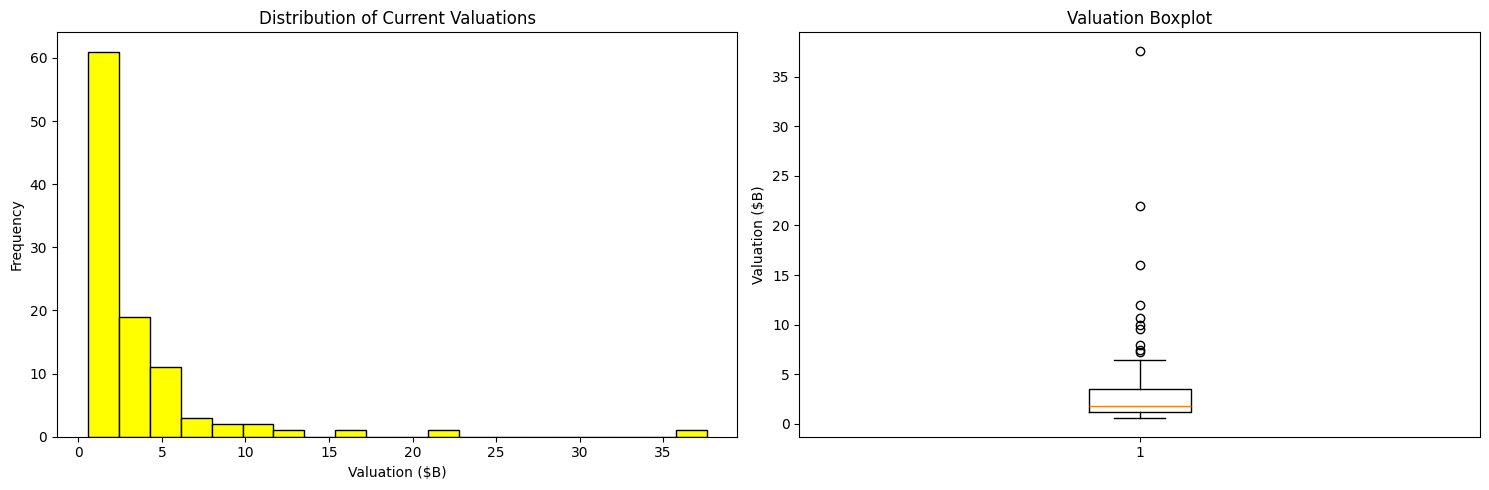

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df['Valuation ($B)'], bins=20 , color="yellow" , edgecolor="black")
plt.title("Distribution of Current Valuations")
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.boxplot(df['Valuation ($B)'])
plt.title('Valuation Boxplot')
plt.ylabel('Valuation ($B)')

plt.tight_layout()
plt.show()




Key insights:


*   Highly right-Skewed distribution(few mega-unicorns)
*   Median valualtion around 2-3B-***Flipkartdomainateswith***37.6B valuation
*   Most unicorns clustered in $1-sB range




Sector Analysis

Sector Distribution

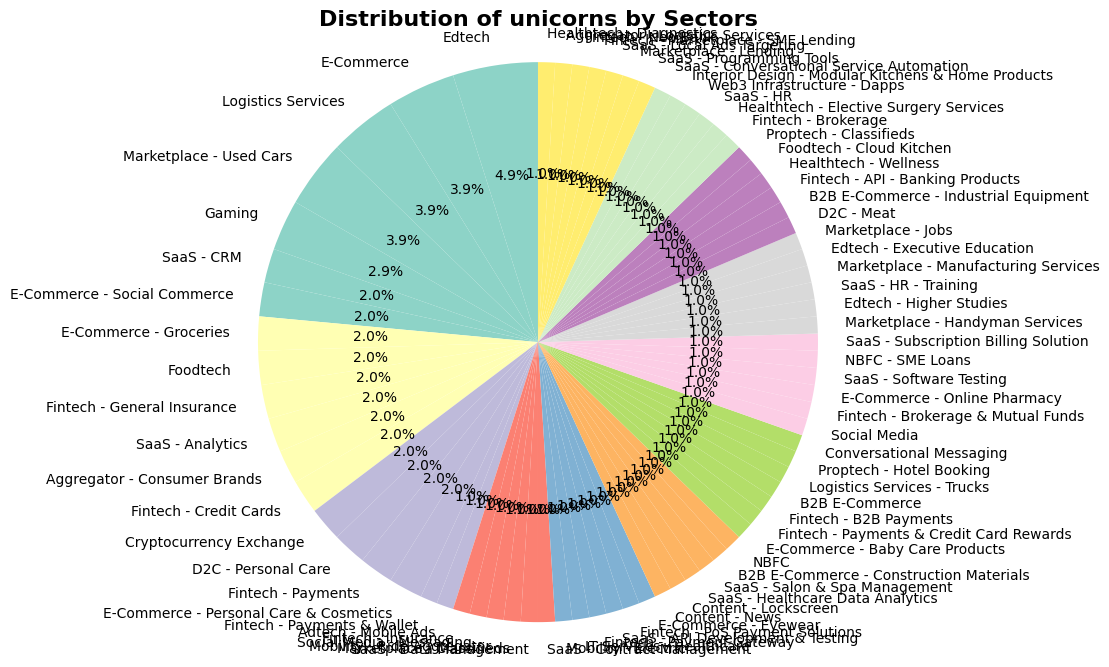

In [68]:
plt.figure(figsize=(12,8))

sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1, len(sector_counts)))

plt.pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%', colors=colors, startangle=90 )
plt.title('Distribution of unicorns by Sectors' , fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

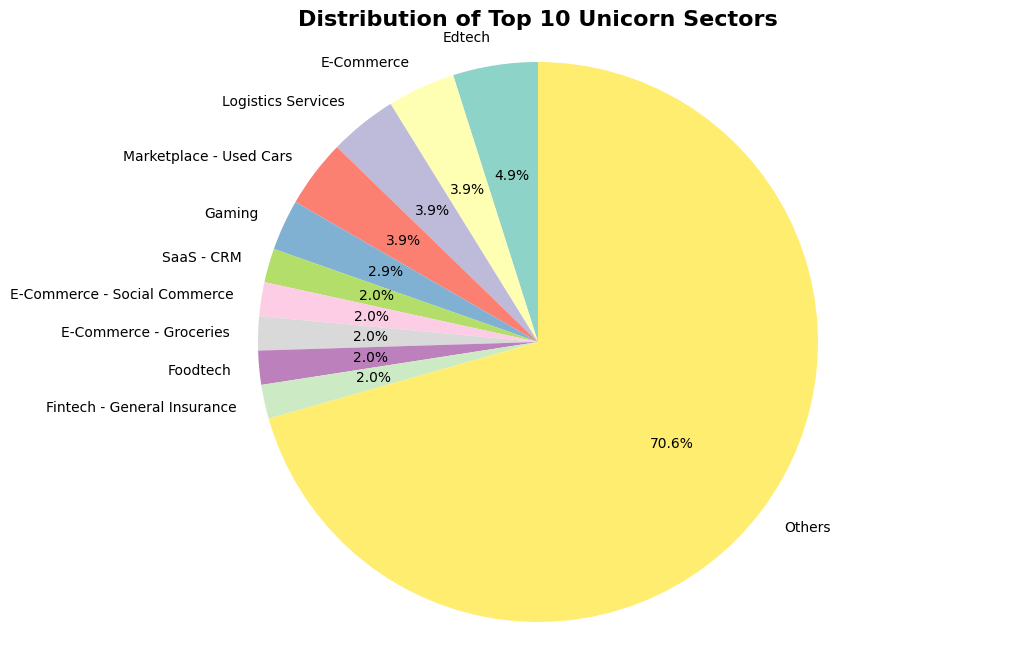

In [69]:
def display_top_k_sectors(df, k):
  sector_counts = df['Sector'].value_counts()

  # Select top K sectors and group the rest as 'Others'
  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    other_sectors_count = sector_counts.iloc[k:].sum()
    top_sectors['Others'] = other_sectors_count
  else:
    top_sectors = sector_counts

  plt.figure(figsize=(12, 8))
  colors = plt.cm.Set3(np.linspace(0, 1, len(top_sectors)))

  plt.pie(top_sectors.values, labels=top_sectors.index, autopct='%1.1f%%',
          colors=colors, startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn Sectors', fontsize=16, fontweight='bold')
  plt.axis('equal')
  plt.show()

# Call the function with K=5 to display top 5 sectors
display_top_k_sectors(df, 10)

Top sectors bar chart

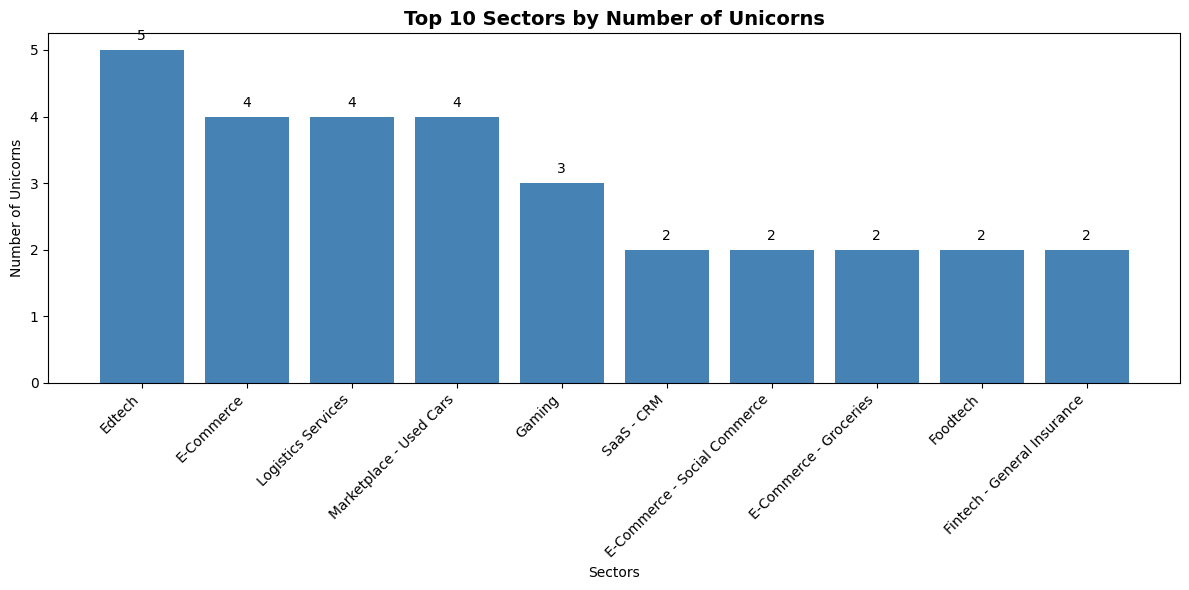

In [70]:
plt.figure(figsize=(12, 6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)), top_sectors.values, color='steelblue')
plt.title('Top 10 Sectors by Number of Unicorns', fontsize=14, fontweight='bold')
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)), top_sectors.index, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_sectors.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Geographic Distribution**

City-wise distribution

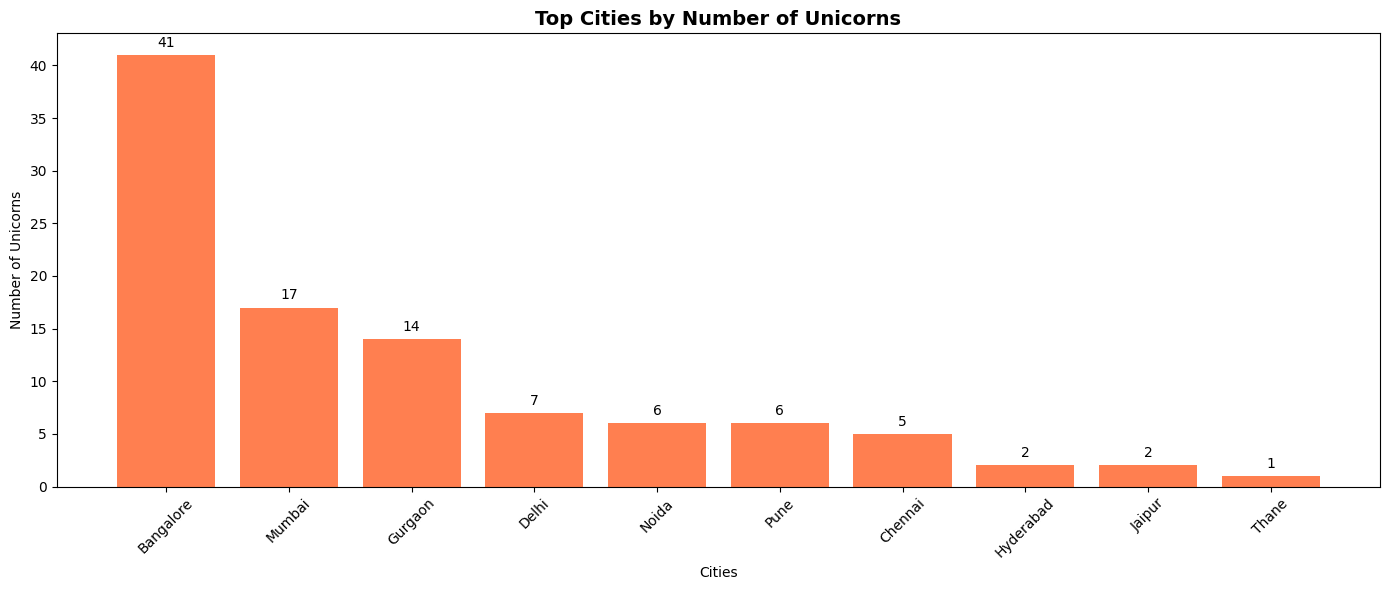

In [71]:
plt.figure(figsize=(14, 6))

city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index, city_counts.values, color='coral')
plt.title('Top Cities by Number of Unicorns', fontsize=14, fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

# Add value labels
for bar, value in zip(bars, city_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Create a summary table

In [72]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count', 'sum', 'mean'],
    'Entry_Year': ['min', 'max']
}).round(2)
city_summary.columns = ['Count', 'Total_Valuation', 'Avg_Valuation', 'First_Entry', 'Last_Entry']
print(city_summary.head(10))


              Count  Total_Valuation  Avg_Valuation  First_Entry  Last_Entry
Primary_City                                                                
Bangalore        41           185.20           4.52         2011        2022
Chennai           5            12.20           2.44         2018        2022
Delhi             7            15.53           2.22         2014        2022
Goa               1             1.53           1.53         2022        2022
Gurgaon          14            37.94           2.71         2015        2022
Hyderabad         2             2.50           1.25         2020        2022
Jaipur            2             2.90           1.45         2021        2022
Mumbai           17            42.80           2.52         2018        2022
Noida             6            30.90           5.15         2015        2022
Pune              6            12.60           2.10         2019        2022


Temporal Analysis

Entry Year Trends

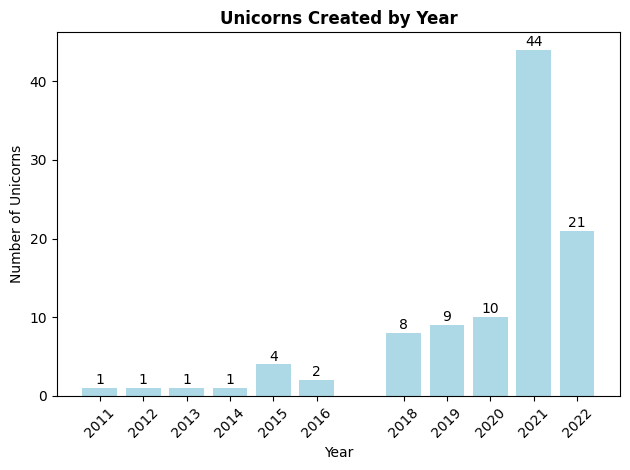

In [73]:
yearly_entries = df['Entry_Year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index, yearly_entries.values, color='lightblue')
plt.title('Unicorns Created by Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index, rotation=45)

# Add value labels
for bar, value in zip(bars, yearly_entries.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Cumulative unicorns

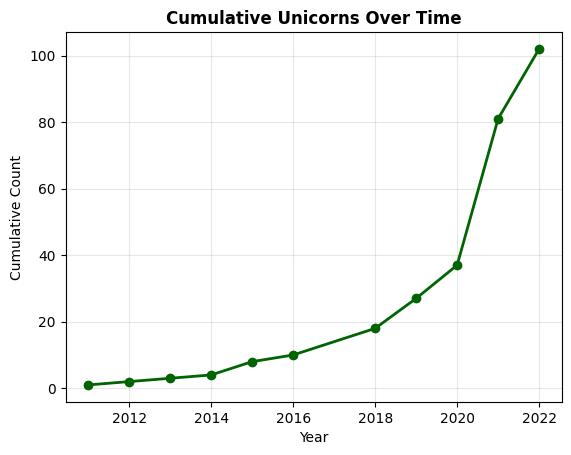

In [74]:
cumulative = yearly_entries.cumsum()
plt.plot(cumulative.index, cumulative.values, marker='o', linewidth=2, markersize=6, color='darkgreen')
plt.title('Cumulative Unicorns Over Time', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True, alpha=0.3)
plt.show()


Average valuation by year

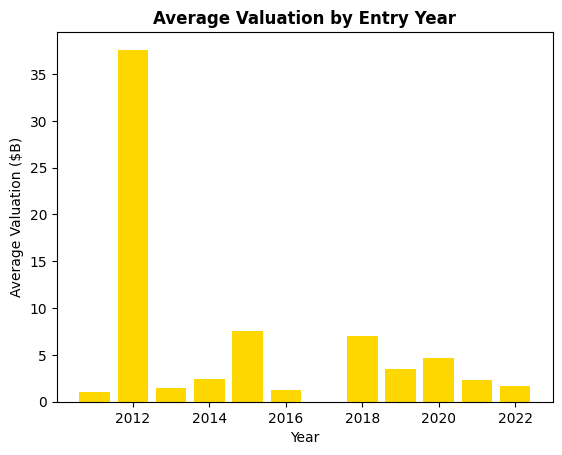

In [75]:
avg_val_by_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index, avg_val_by_year.values, color='gold')
plt.title('Average Valuation by Entry Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()


Sector evolution over time

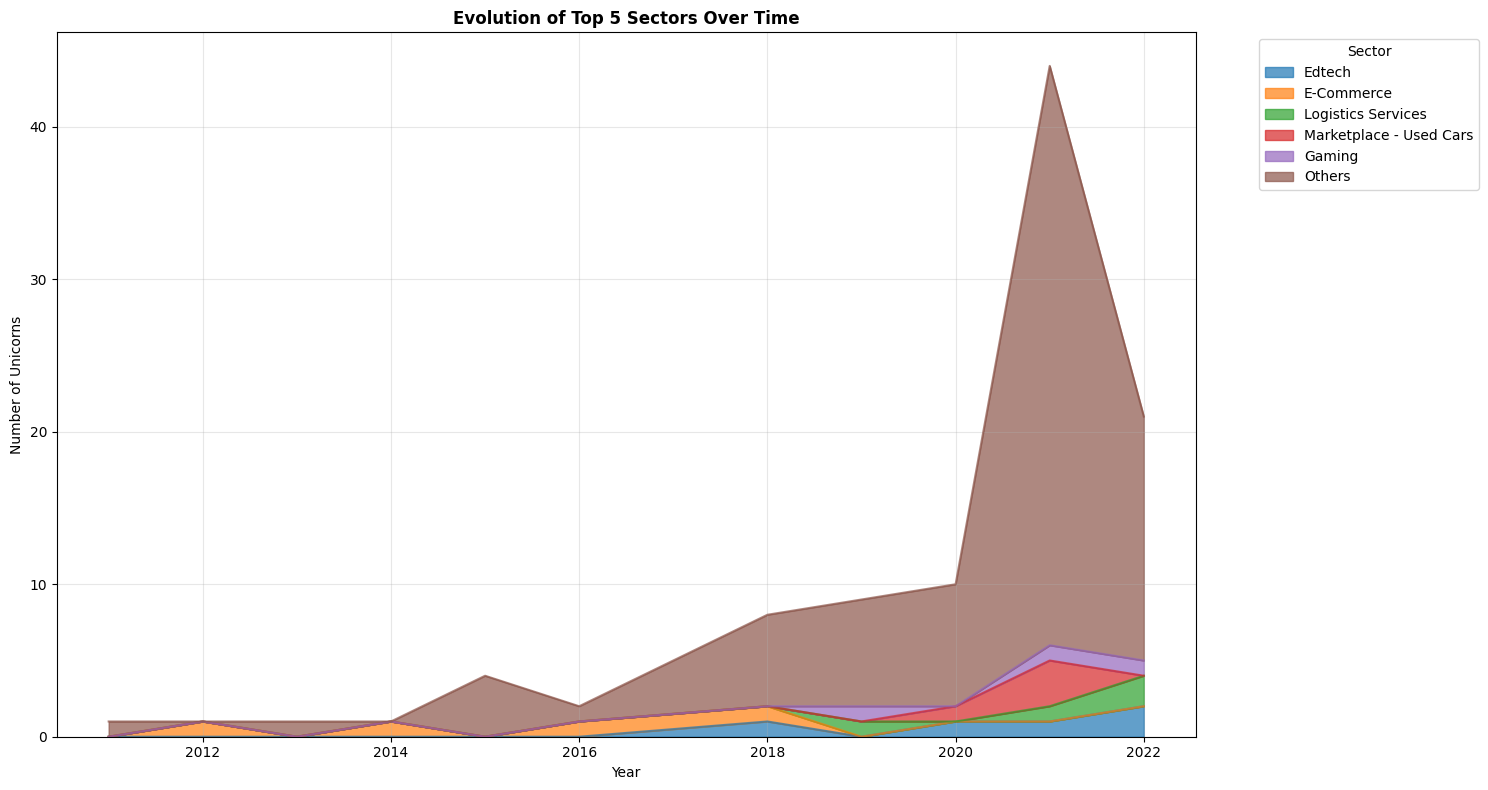

In [77]:

def display_k_sector_evolution(df, k):
  # Group by year and sector, count occurrences
  sector_year = df.groupby(['Entry_Year', 'Sector']).size().unstack(fill_value=0)

  # Select top K sectors based on overall count
  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()

  # Include 'Others' for remaining sectors
  other_sectors_names = [sector for sector in sector_year.columns if sector not in top_k_sectors_names]
  if other_sectors_names:
      sector_year['Others'] = sector_year[other_sectors_names].sum(axis=1)
      sector_year = sector_year[top_k_sectors_names + ['Others']]
  else:
      sector_year = sector_year[top_k_sectors_names]


  plt.figure(figsize=(15, 8))
  sector_year.plot(kind='area', stacked=True, alpha=0.7, ax=plt.gca())

  plt.title(f'Evolution of Top {k} Sectors Over Time', fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()

# Call the function with K=5
display_k_sector_evolution(df, 5)

In [78]:

df['Company'].unique()

array(['InMobi', 'Flipkart^', 'Mu Sigma', 'Snapdeal*', 'PayTM^',
       'Ola Cabs', 'Quikr*', 'Zomato^', 'ShopClues*', 'Hike*', 'BYJUS',
       'PayTM Mall*', 'Swiggy', 'PolicyBazaar^', 'Freshworks^',
       'OYO Rooms', 'Udaan', 'BillDesk', 'Delhivery^', 'Rivigo',
       'BigBasket', 'Dream11', 'Druva Software', 'Icertis', 'CitiusTech',
       'Ola Electric', 'Lenskart', 'Pine Labs', 'Nykaa^', 'Postman',
       'Unacademy', 'RazorPay', 'Cars24', 'PhonePe^', 'Zenoti',
       'Dailyhunt', 'Glance InMobi', 'Digit', 'Innovaccer',
       'Infra.Market', 'Five Star Business Finance^', 'FirstCry',
       'Meesho', 'CRED', 'PharmEasy', 'Groww', 'ShareChat', 'Gupshup',
       'ChargeBee', 'Urban Company', 'Moglix', 'Zeta', 'BrowserStack',
       'BlackBuck', 'Droom', 'OfBusiness', 'BharatPe', 'MindTickle',
       'upGrad', 'CoinDCX', 'Eruditus', 'Blinkit^', 'Zetwerk',
       'Mobile Premier League', 'Apna.co', 'Vedantu', 'Licious',
       'CoinSwitch', 'Rebel Foods', 'Cardekho', 'Acko', 'MyGla